In [10]:
import os
import fnmatch
import cv2
import numpy as np
import string
import time

from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, LSTM, Reshape, BatchNormalization,add, Input, Conv2D, MaxPool2D, Lambda, Bidirectional,GRU,concatenate
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [11]:
hindi_alphabets = [chr(alpha) for alpha in range(2304, 2432)]
print(hindi_alphabets)
char_list=[]
char_list=hindi_alphabets
def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(hindi_alphabets.index(char))
        except:
            print(char)
        
    return dig_lst
print(len(char_list))

['ऀ', 'ँ', 'ं', 'ः', 'ऄ', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ऌ', 'ऍ', 'ऎ', 'ए', 'ऐ', 'ऑ', 'ऒ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'ऩ', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ऱ', 'ल', 'ळ', 'ऴ', 'व', 'श', 'ष', 'स', 'ह', 'ऺ', 'ऻ', '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॄ', 'ॅ', 'ॆ', 'े', 'ै', 'ॉ', 'ॊ', 'ो', 'ौ', '्', 'ॎ', 'ॏ', 'ॐ', '॑', '॒', '॓', '॔', 'ॕ', 'ॖ', 'ॗ', 'क़', 'ख़', 'ग़', 'ज़', 'ड़', 'ढ़', 'फ़', 'य़', 'ॠ', 'ॡ', 'ॢ', 'ॣ', '।', '॥', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९', '॰', 'ॱ', 'ॲ', 'ॳ', 'ॴ', 'ॵ', 'ॶ', 'ॷ', 'ॸ', 'ॹ', 'ॺ', 'ॻ', 'ॼ', 'ॽ', 'ॾ', 'ॿ']
128


In [14]:
inputs = Input(shape=(32,128,1))

conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
batch_norm_1 = BatchNormalization()(conv_1)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(batch_norm_1)

conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
batch_norm_2= BatchNormalization()(conv_2)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(batch_norm_2)
 
conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)
batch_norm_3 = BatchNormalization()(conv_3)
conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)
batch_norm_4 = BatchNormalization()(conv_4)
pool_4 = MaxPool2D(pool_size=(2, 1))(batch_norm_4)
 
conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)
batch_norm_5 = BatchNormalization()(conv_5)
conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
 
conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)
squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
#squeezed = (conv_7) 
# bidirectional LSTM layers with units=128
#best model
#blstm_1 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(squeezed)
#blstm_2 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(blstm_1)

#bestmodel2
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)


#GRU
'''
gru_1 = GRU(128, return_sequences=True, kernel_initializer='he_normal', name='gru1',dropout = 0.1)(squeezed)  # (None, 32, 512)
gru_1b = GRU(128, return_sequences=True, go_backwards=True, kernel_initializer='he_normal', name='gru1_b',dropout = 0.1)(squeezed)
reversed_gru_1b = Lambda(lambda inputTensor: K.reverse(inputTensor, axes=1)) (gru_1b)

gru1_merged = add([gru_1, reversed_gru_1b])  # (None, 32, 512)
gru1_merged = BatchNormalization()(gru1_merged)
    
gru_2 = GRU(128, return_sequences=True, kernel_initializer='he_normal', name='gru2',dropout = 0.1)(gru1_merged)
gru_2b = GRU(128, return_sequences=True, go_backwards=True, kernel_initializer='he_normal', name='gru2_b',dropout = 0.1)(gru1_merged)
reversed_gru_2b= Lambda(lambda inputTensor: K.reverse(inputTensor, axes=1)) (gru_2b)

gru2_merged = concatenate([gru_2, reversed_gru_2b])  # (None, 32, 1024)
gru2_merged = BatchNormalization()(gru2_merged)
'''
 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

In [32]:
act_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 128, 1)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 128, 64)       640       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 128, 64)       256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 64, 128)       73856     
_________________________________________________________________
batch_normalization_14 (Batc (None, 16, 64, 128)       512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 32, 128)        0   

In [82]:
act_model.load_weights('best_model2.hdf5')

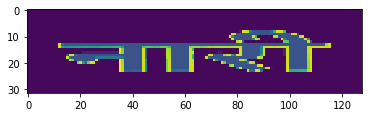

In [91]:
import cv2
image=cv2.imread("0.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img=gray
h,w=img.shape
img=cv2.resize(img,(128,32))
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
img = np.expand_dims(img , axis = 2)
image_norm=img/255

In [92]:
import numpy as np
im=np.zeros((1,32,128,1))
im[0,:,:,:]=image_norm
prediction = act_model.predict(im)

In [93]:
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])

predicted text = जार्ष



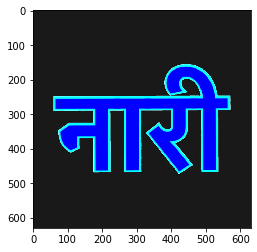

In [94]:
for x in out:
    print("predicted text = ", end = '')
    for p in x:  
        if int(p) != -1:
            print(char_list[int(p)], end = '')       
    print('\n')
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()